**Initialization**
* I use these 3 lines of code on top of my each Notebooks because it will help to prevent any problems while reloading and reworking on a same Project or Problem. And the third line of code helps to make visualization within the Notebook.

In [1]:
#@ Initialization:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**Downloading the Dependencies**
* I have downloaded all the Libraries and Dependencies required for this Project in one particular cell.

In [2]:
#@ Downloading the Libraries and Dependencies:
import sys, os, tarfile, urllib.request
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

#@ Visualization Dependencies:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

PROJECT_ROOT_DIR = "."
ID = "California Housing"
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", ID)
if not os.path.isdir(IMAGE_PATH):
    os.makedirs(IMAGE_PATH)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
  print("Saving Figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

#@ Ignoring the Warnings:
import warnings
warnings.filterwarnings(action="ignore", message="^ internal")

In [3]:
#@ Downloading the Dependencies:
# !pip install sweetviz
# import sweetviz as sv
import IPython

**Getting the Data**
* I have used Google Colab for this Project so the process of downloading and reading the Data might be different in other platforms. I will use **California Housing Prices** Dataset from the StatLib Repository for this Project. This Dataset was based on Data from the 1990 California Census. The Data has metrics such as Population, Median Income, Median House Price and so on for each block group in California. I will build a Model of Housing Prices in California using the California Census Dataset.

In [4]:
#@ Getting the Data:
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

fetch_housing_data()                                                           # Initializing the Function.

#@ Getting the Data:
def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

#@ Inspecting the Data:
housing = load_housing_data()
housing.head(7)                                                                # Inspecting the Data.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [5]:
#@ Analyzing the DataFrame using Sweetviz:
# report = sv.analyze(housing)
# IPython.display.HTML("SWEETVIZ_REPORT.html")

### **Exploratory Data Analysis**
* The analysis report presents that the DataFrame has 20640 rows and each row represents one district. The report also presents that the DataFrame has 10 features where one is categorical and 9 are numerical. The info method is standard and useful to get the quick description of the Data, in particular the attributes type and the number of non null values. 

In [6]:
#@ Exploratory Data Analysis:
housing.info()                  # Inspecting the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Exploratory Data Analysis**
* The total bedrooms attribute has only 20433 non null values which means that 207 districts are missing here. The ocean proximity attribute is of object Data type and the values in this attribute is repetitive which means that it is probably categorical attribute. The value counts method can be used to find the categories and number of districts belonging to a particular category. The describe method shows the summary of the numerical attributes.

In [7]:
#@ Exploratory Data Analysis:
print(housing["ocean_proximity"].value_counts())          # Inspecting the Categorical Attribute.
print("\n")
IPython.display.display(housing.describe())               # Inspecting the Numerical Attributes. 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving Figure Histogram Plots


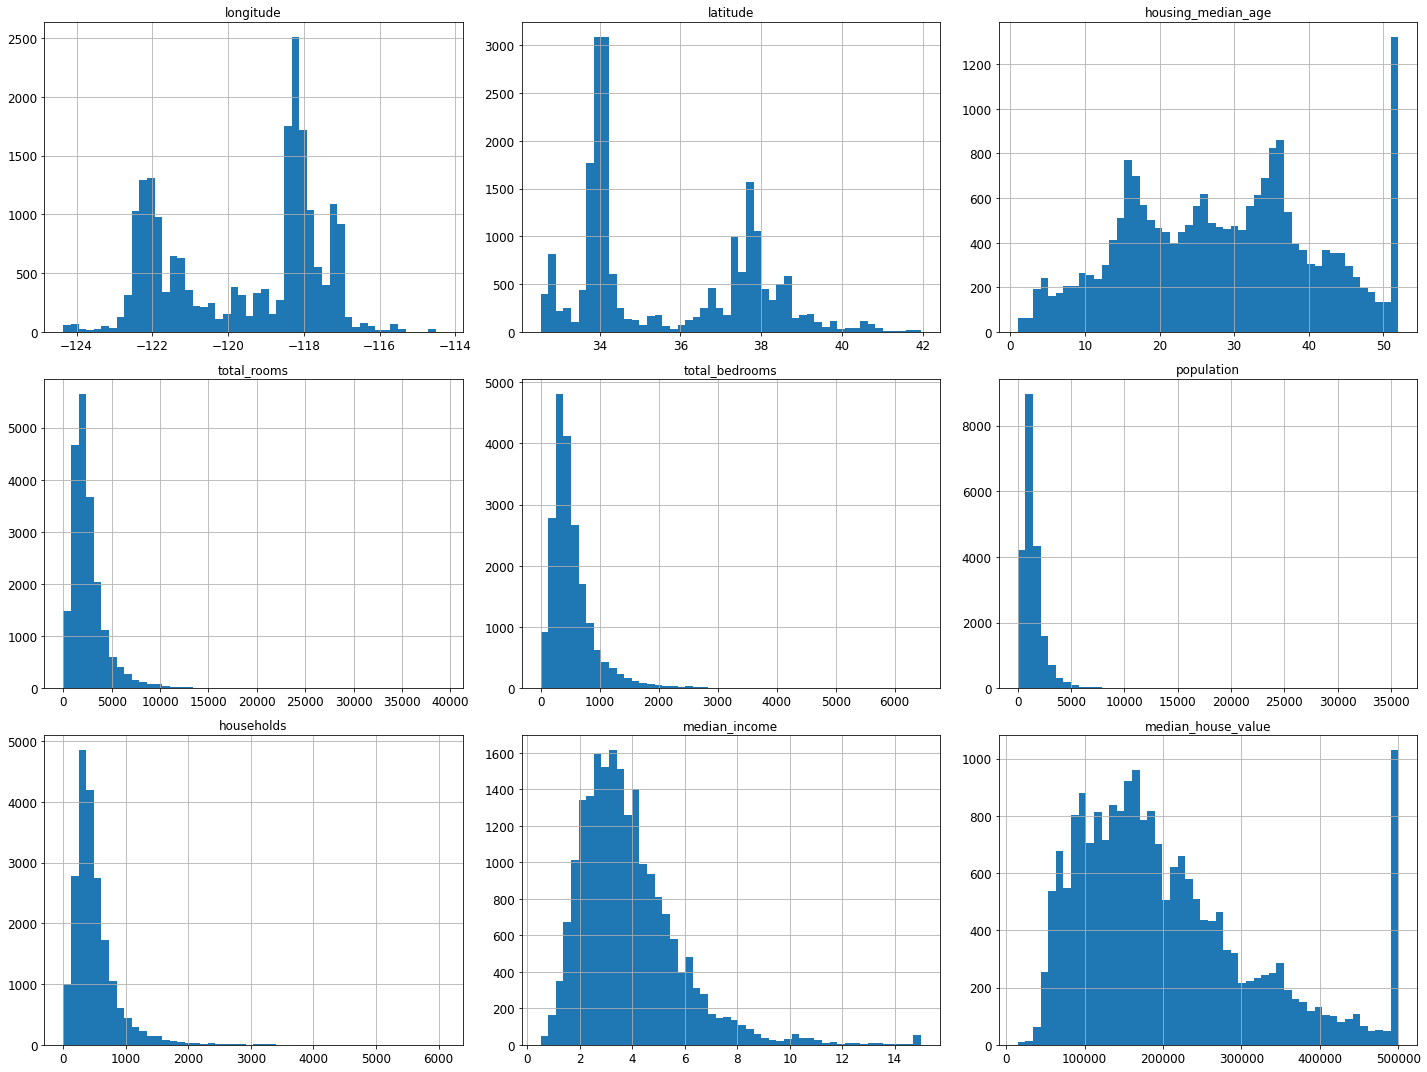

In [8]:
#@ Inspecting the Data using Histograms:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))  
save_fig("Histogram Plots")              
plt.show()                                      # Plotting the Histograms of Numerical Attributes.

**Processing the Data**
* I will create a Test Dataset and set them aside. I will pick 20 percent of the instances randomly.

In [9]:
#@ Splitting the Dataset:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=11)

#@ Inspecting the Dataset:
print(f"Training set: {len(train_set)}")                                             # Number of Training Dataset.
print(f"\nTesting set: {len(test_set)}")                                             # Number of Testing Dataset.
IPython.display.display(train_set.head(3))    
print("\n")                    
IPython.display.display(test_set.head(3))

Training set: 16512

Testing set: 4128


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20025,-119.05,36.07,21.0,2472.0,523.0,1238.0,504.0,1.7756,62900.0,INLAND
10772,-117.89,33.66,32.0,2736.0,550.0,1279.0,534.0,5.5422,253100.0,<1H OCEAN
16691,-120.61,35.13,16.0,3431.0,721.0,1777.0,701.0,2.7301,190400.0,<1H OCEAN


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2734,-115.56,32.78,34.0,2856.0,555.0,1627.0,522.0,3.2083,76200.0,INLAND
9087,-118.17,34.66,9.0,1561.0,253.0,731.0,233.0,5.7049,173200.0,INLAND
15789,-122.40,37.78,52.0,464.0,202.0,286.0,148.0,1.6125,112500.0,NEAR BAY


**Exploratory Data Analysis**
* I will inspect the median income attribute more closely using Histogram.

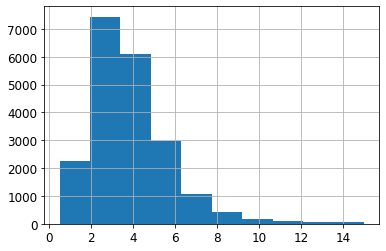

In [10]:
#@ Inspecting the median income attribute:
housing["median_income"].hist()

* By observing the Histogram more closely, the values of median income are clustered around 2 and 6 but some median income values goes beyond 6. I will create an income category attribute with 5 categories which are labeled from 1 to 5. 

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64




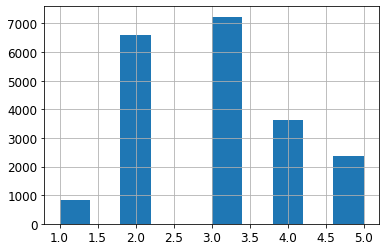

In [12]:
#@ Creating the Income Categories:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3, 4.5, 6, np.inf],
                               labels=[1, 2, 3, 4, 5])

#@ Inspecting the Income Categories:
print(housing["income_cat"].value_counts())
print("\n")
housing["income_cat"].hist()                                      # Inspecting the Income Categories using Histogram.

**Stratified Sampling**
* Now, I will do Stratified Sampling based on the Income Category. I will use Scikit Learn's StratifiedShuffleSplit class for the same. 

In [17]:
#@ Stratified Sampling based on Income Category:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=11)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

#@ Inspecting the Sampling:
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))            # Income Category Proportions in Test set.
print("\n")
print(housing["income_cat"].value_counts() / len(housing))                          # Income Category Proportions in Full Dataset.

#@ Comparing the Proportions:
def income_cat_propotions(data):
  return data["income_cat"].value_counts() / len(data)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=11)     # Splitting the Dataset.
compare_props = pd.DataFrame({
    "Overall": income_cat_propotions(housing),                                      # Full Dataset.
    "Stratified": income_cat_propotions(strat_test_set),                            # Stratified Sampling Dataset.
    "Random": income_cat_propotions(test_set)                                       # Random Smapling Dataset.
}).sort_index()
compare_props["Random % Error"] = 100 * compare_props["Random"] / compare_props["Overall"] -100
compare_props["Stratified % Error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] -100

#@ Inspecting the Proportions:
print("\n")
IPython.display.display(compare_props)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64


3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64




,Overall,Stratified,Random,Random % Error,Stratified % Error
1,0.039826,0.039729,0.032946,-17.274939,-0.243309
2,0.318847,0.318798,0.312984,-1.838626,-0.015195
3,0.350581,0.350533,0.353440,0.815368,-0.013820
4,0.176308,0.176357,0.184835,4.836494,0.027480
5,0.114438,0.114583,0.115795,1.185436,0.127011


In [18]:
#@ Removing the Income Cat from the Data:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

### **Exploratory Data Analysis**
* So far, I have only taken the quick glance at the Data to get the general understanding of the Data. Now, the goal is to go little more in the depth. 


**Visualizing the Geographical Data**
* Since, there is a Geographical Information latitude and longitude it will be a good idea to create the scatter plot of all districts to visualize the Data. I will use alpha option to 0.1 which makes it much easier to visualize the places where there is high density of data points.

Saving Figure Geographical Plot


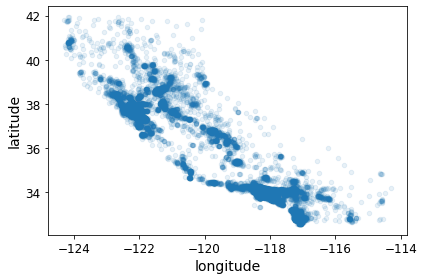

In [19]:
#@ Creating the copy of the Training set:
housing = strat_train_set.copy()

#@ Visualizing the Geographical Data:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("Geographical Plot")

* Now, let's look at the Housing prices. The radius of each circle represents the district's population option s, the color represents the price option c and I will use predefined color map option cmap called jet which ranges from blue low values and red high values. 

Saving Figure Geographical Plots


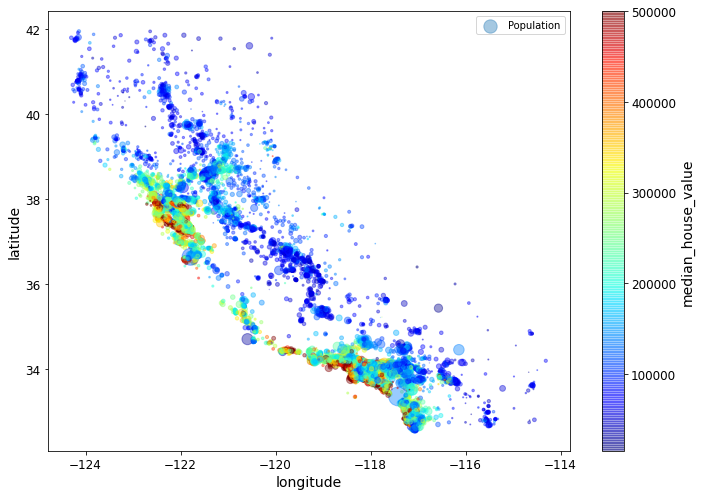

In [20]:
#@ Visualizing the Housing Prices:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="Population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, 
             sharex=False)
plt.legend()
save_fig("Geographical Plots")

* The Image tells that the Housing prices are very much related to the location and to the population density. It will probably be useful to use a clustering algorithm to detect the main clusters and add new features that measures the proximity to the cluster centres. 